# Nikita Tejwani
### HUDK 4050: Core Methods in Educational Data Mining
### Fall 2021

##### *Assignment 4: Individual Coding Assignment (ICE) 4*

In [ ]:
#Import necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm

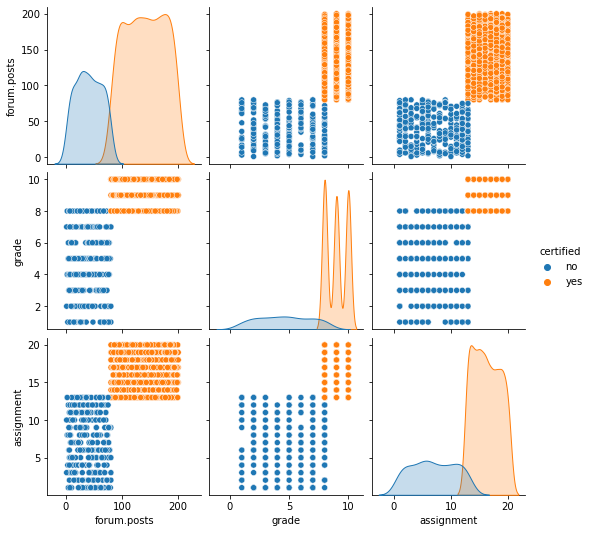

In [2]:
#Create a dataframe and create a pairplot showing combinations of student behaviours and whether students receive a certificate
mooc = pd.read_csv("ICE4_Data.csv")
sns.pairplot(mooc, hue = 'certified')

In [3]:
#Convert the 'certified' variable to a binary dummy

dummies = pd.get_dummies(mooc['certified'], prefix = 'certified', drop_first = True)
mooc['certified_yes'] = dummies
mooc.drop('certified', axis = 1, inplace = True)

In [4]:
#Forms a multiple linear regression model
#certified_yes = -63.13 + 0.64*forum.posts + 0.52*grade + 0.86*assignment
predictors = mooc[['forum.posts', 'grade', 'assignment']].to_numpy()
target = mooc['certified_yes'].values.reshape(-1, 1)

mooc_logit_1 = LogisticRegression()
mooc_logit_1.fit(predictors, target)
print(mooc_logit_1.intercept_)
print(mooc_logit_1.coef_)

[-63.13291439]
[[0.62419697 0.52270711 0.85766257]]


C:\Users\Niki\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [5]:
#Forms a multiple linear regression model
#certified_yes = 0.04*forum.posts - 0.32*grade + 0.03*assignment
mooc_logit_2 = sm.Logit(target, predictors)
mooc_logit_2_fit = mooc_logit_2.fit()
print(mooc_logit_2_fit.summary())

Optimization terminated successfully.
         Current function value: 22.457768
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Fri, 15 Oct 2021   Pseudo R-squ.:                     inf
Time:                        16:52:22   Log-Likelihood:                -22458.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0378      0.003     10.852      0.000       0.031       0.045
x2            -0.3202      0

C:\Users\Niki\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Niki\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Niki\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3489: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


|--- feature_0 <= 79.50
|   |--- class: 0
|--- feature_0 >  79.50
|   |--- feature_1 <= 7.50
|   |   |--- class: 0
|   |--- feature_1 >  7.50
|   |   |--- class: 1



[Text(133.92000000000002, 181.2, 'Forum Posts <= 79.5\ngini = 0.399\nsamples = 1000\nvalue = [275, 725]\nclass = Certified'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 271\nvalue = [271, 0]\nclass = Not Certified'),
 Text(200.88000000000002, 108.72, 'Grade <= 7.5\ngini = 0.011\nsamples = 729\nvalue = [4, 725]\nclass = Certified'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Not Certified'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 725\nvalue = [0, 725]\nclass = Certified')]

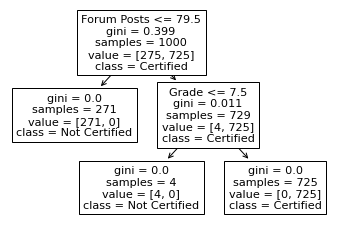

In [6]:
#Create two forms of a decision tree for whether a student will pass the class based on their forum posts, grade, and completion of optional assignments
predictor_tree = mooc.drop('certified_yes', axis = 1)
target_tree = mooc.certified_yes
mooc_tree_model = DecisionTreeClassifier()
mooc_tree_model.fit(predictor_tree, target_tree)
text_representation = tree.export_text(mooc_tree_model)

#First form of decision tree
print(text_representation)

#Second form of decision tree
tree.plot_tree(mooc_tree_model,
              feature_names = ['Forum Posts', 'Grade', 'Assignments'],
              class_names = ['Not Certified', 'Certified'])

In [7]:
#Initialize Naive Bayes model
mooc_NB = GaussianNB()
mooc_NB.fit(predictors, target)

C:\Users\Niki\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

Optimization terminated successfully.
         Current function value: 21.636621
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  800
Model:                          Logit   Df Residuals:                      797
Method:                           MLE   Df Model:                            2
Date:                Fri, 15 Oct 2021   Pseudo R-squ.:                     inf
Time:                        16:52:22   Log-Likelihood:                -17309.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0398      0.004      9.802      0.000       0.032       0.048
x2            -0.3095      0

C:\Users\Niki\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Niki\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Niki\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3489: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull
C:\Users\Niki\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

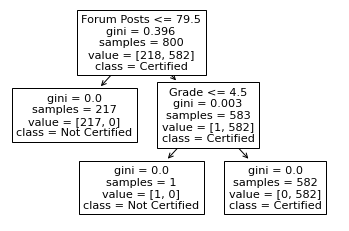

In [8]:
predictor_train, predictor_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.2)

#Form a new logit model based on training data with statsmodels
#Only the statsmodels method is used because the coefficients have more conceptual significance when the intercept is 0
logit = sm.Logit(target_train, predictor_train)
logit_fit = logit.fit()
print(logit_fit.summary())

#Form a new decision tree model based on training data
decision_tree = DecisionTreeClassifier()
decision_tree.fit(predictor_train, target_train)
tree.plot_tree(decision_tree,
              feature_names = ['Forum Posts', 'Grade', 'Assignments'],
              class_names = ['Not Certified', 'Certified'])

#Form a new Naive Bayes model based on training data

nb = GaussianNB()
nb.fit(predictor_train, target_train)

In [9]:
#Make predictions for the test dataset using each of the models from the previous cell.

#Logistic Regression Model
logit_predictions = logit_fit.predict(predictor_test)
logit_predictions = logit_predictions.round().astype('uint8')


#Decision Tree Model
tree_predictions = decision_tree.predict(predictor_test)

#Naive Bayes Model
nb_predictions = nb.predict(predictor_test)

In [11]:
#Logistic Regression Confusion Matrix
print(confusion_matrix(target_test, logit_predictions))

#Decision Tree Confusion Matrix
print(confusion_matrix(target_test, tree_predictions))

#Naive Bayes Confusion Matrix
print(confusion_matrix(target_test, nb_predictions))

[[ 24  33]
 [  0 143]]
[[ 55   2]
 [  0 143]]
[[ 57   0]
 [  0 143]]


In [12]:
#Find accuracy score for each model
ac_logit = accuracy_score(target_test, logit_predictions)
ac_tree = accuracy_score(target_test, tree_predictions)
ac_nb = accuracy_score(target_test, nb_predictions)

print("The accuracy score for Logistic Regression is ", ac_logit*100, "%")
print("The accuracy score for Decision Tree is ", ac_tree*100, "%")
print("The accuracy score for Naive Bayes is ", ac_nb*100, "%")

The accuracy score for Logistic Regression is  83.5 %
The accuracy score for Decision Tree is  99.0 %
The accuracy score for Naive Bayes is  100.0 %


In [16]:
#K nearest neighbor

#Model fitting
knn = KNeighborsClassifier()
knn.fit(predictor_train, target_train)

#Model testing
knn_predictions = knn.predict(predictor_test)
print(confusion_matrix(target_test, knn_predictions))

#Accuracy of model
ac_knn = accuracy_score(target_test, knn_predictions)
print("The accuracy score for K Nearest Neighbors is ", ac_knn*100, "%")

[[ 57   0]
 [  0 143]]
The accuracy score for K Nearest Neighbors is  100.0 %


<ipython-input-16-4bf1bbcb51ca>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(predictor_train, target_train)


In [13]:
mooc

,forum.posts,grade,assignment,certified_yes
0,7,3,9,0
1,7,4,1,0
2,191,8,19,1
3,130,10,18,1
4,135,8,18,1
...,...,...,...,...
995,88,10,13,1
996,153,10,19,1
997,41,4,3,0
998,47,6,12,0
